# Домашняя работа №1 - Постников М. М.

### Подключаем библиотеки

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [3]:
%matplotlib inline
matplotlib.style.use('ggplot')

### Собираем данные

https://data.cityofnewyork.us/api/views/ye3c-m4ga/rows.csv?accessType=DOWNLOAD

In [4]:
df = pd.read_csv('https://data.cityofnewyork.us/api/views/ye3c-m4ga/rows.csv?accessType=DOWNLOAD', sep = ',')

In [5]:
#df = pd.read_csv('Civil_List_2014.csv', sep = ',')

In [6]:
#print df.head(5)

#### Посмотрим, какие данные хранятся в таблице

In [7]:
#Переименуем столбцы
df.columns = ['department', 'name', 'address', 'ttl', 'pc', 'sal_rate']

In [8]:
print df.values[:5]

[[868 'B J  SANDIFORD' 'DEPARTMENT OF CITYWIDE ADM' '12702' 'X' '$5.00']
 [868 'C A  WIGFALL' 'DEPARTMENT OF CITYWIDE ADM' '12702' 'X' '$5.00']
 [69 'A E A-AWOSOGBA' 'HRA/DEPARTMENT OF SOCIAL S' '52311' 'A' '$51955.00']
 [868 'K D AABY' 'DEPARTMENT OF CITYWIDE ADM' '10209' 'X' '$12.00']
 [56 'I D AADIL' 'POLICE DEPARTMENT' '71012' 'A' '$46953.00']]


#### Необходимо изменить последний столбец, сделав его числовым

In [9]:
df['sal_rate'] = map(lambda y: float(y[1:]), df['sal_rate'].values)

### Посчитать распределение зарплат служащих по ее размеру и построить для него гистограмму

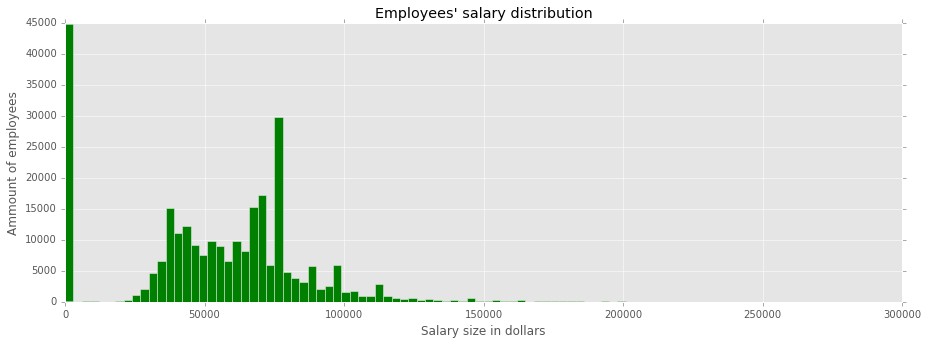

In [10]:
plt.figure(figsize=(15,5))
plt.hist(df.sal_rate.values, bins=100, color='g')
plt.title("Employees' salary distribution")
plt.xlabel('Salary size in dollars')
plt.ylabel('Ammount of employees')
plt.show()

### На каких должностях наблюдается наибольшая дисперсия по зарплатам?
#### (вывести топ-10 позиций, при условии, что на данной позиции работает больше 20 человек)

In [11]:
df_grouped = df.groupby('ttl')

In [12]:
title_codes = []
for code, group in df_grouped:
    if len(group) > 20:
        disp = (sum((group.sal_rate.values - group.sal_rate.mean())**2)/len(group))
        title_codes.append((disp, code))
title_codes.sort(reverse=True)

In [13]:
print 'Top 10 title codes with greatest dispersion:'
for i, (disp, code) in enumerate(title_codes[:10]):
    print '%2.d) %s' % (i+1, code)

Top 10 title codes with greatest dispersion:
 1) 12991
 2) 30177
 3) 0668A
 4) 280
 5) 30114
 6) 10245
 7) 158
 8) 108
 9) 52110
10) 201


### Вывести топ-10 департаментов, для которых медианная зарплата наибольшая/наименьшая

In [14]:
df_grouped = df.groupby('address')

In [15]:
median_salaries = []
for agency_name, group in df_grouped:
    median_salaries.append((group.sal_rate.median(), agency_name))

In [16]:
median_salaries.sort(reverse=True)
print 'Top 10 departments with greatest median salary:'
for i, (salary, name) in enumerate(median_salaries[:10]):
    print '%2.d) %s\twith median salary: %.2f$' % (i+1, name, salary)

Top 10 departments with greatest median salary:
 1) FINANCIAL INFORMATION SERV	with median salary: 100638.50$
 2) COMMUNITY BOARD NO.1 BRONX	with median salary: 95086.50$
 3) COMMUNITY BOARD NO.3-BRONX	with median salary: 95010.00$
 4) COMMUNITY BOARD NO.6-BRONX	with median salary: 92278.00$
 5) OFFICE OF COLLECTIVE BARGA	with median salary: 86412.50$
 6) COMMUNITY BOARD NO.5-BRONX	with median salary: 85111.00$
 7) CONFLICTS OF INTEREST BOAR	with median salary: 82087.00$
 8) COMMUNITY BOARD NO.9-BROOK	with median salary: 80983.00$
 9) INDEPENDENT BUDGET OFFICE	with median salary: 80000.00$
10) TAX COMMISSION	with median salary: 79039.00$


In [17]:
median_salaries.sort()
print 'Top 10 departments with smallest median salary:'
for i, (salary, name) in enumerate(median_salaries[:10]):
    print '%2.d) %s\twith median salary: %.2f$' % (i+1, name, salary)

Top 10 departments with smallest median salary:
 1) DEPARTMENT OF CITYWIDE ADM	with median salary: 5.00$
 2) CUNY MEDGAR EVERS COLLEGE	with median salary: 6.51$
 3) DEPARTMENT FOR THE AGING	with median salary: 8.75$
 4) BOARD OF ELECTIONS	with median salary: 17.92$
 5) CUNY COLLEGE OF STATEN ISL	with median salary: 18.00$
 6) COMMUNITY BOARD NO.2-RICHM	with median salary: 25.81$
 7) COMMUNITY BOARD NO.11-BRON	with median salary: 34.52$
 8) COMMUNITY BOARD NO.10-BRON	with median salary: 37.06$
 9) CUNY KINGSBOROUGH COMMMUNI	with median salary: 38.91$
10) OFFICE OF ADMINISTRATIVE T	with median salary: 39.47$


### Вывести график зависимости медианной зарплаты от размера департамента (scatter plot). 

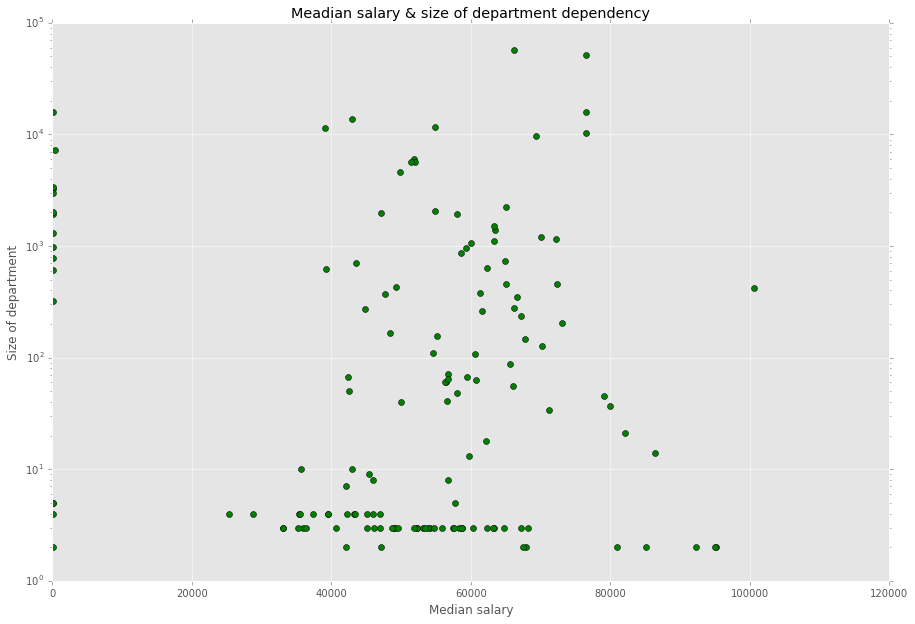

In [18]:
plt.figure(figsize=(15,10))
plt.plot(df_grouped.sal_rate.median().values+1, df_grouped.size().values, 'go')
plt.yscale('log')
plt.title('Meadian salary & size of department dependency')
plt.xlabel('Median salary')
plt.ylabel('Size of department')
plt.show()